Epoch 1/30


/Users/test/Documents/kjm996/2024-2학기/AI-머신러닝/idk-tensorflow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 - 4s - 8ms/step - accuracy: 0.8076 - loss: 0.0364 - val_accuracy: 0.8294 - val_loss: 0.0278
Epoch 2/30
469/469 - 4s - 9ms/step - accuracy: 0.8582 - loss: 0.0233 - val_accuracy: 0.8550 - val_loss: 0.0232
Epoch 3/30
469/469 - 4s - 9ms/step - accuracy: 0.8695 - loss: 0.0209 - val_accuracy: 0.8675 - val_loss: 0.0203
Epoch 4/30
469/469 - 4s - 9ms/step - accuracy: 0.8760 - loss: 0.0194 - val_accuracy: 0.8600 - val_loss: 0.0215
Epoch 5/30
469/469 - 4s - 8ms/step - accuracy: 0.8817 - loss: 0.0187 - val_accuracy: 0.8691 - val_loss: 0.0203
Epoch 6/30
469/469 - 4s - 9ms/step - accuracy: 0.8874 - loss: 0.0178 - val_accuracy: 0.8697 - val_loss: 0.0202
Epoch 7/30
469/469 - 4s - 9ms/step - accuracy: 0.8908 - loss: 0.0172 - val_accuracy: 0.8748 - val_loss: 0.0196
Epoch 8/30
469/469 - 4s - 9ms/step - accuracy: 0.8951 - loss: 0.0165 - val_accuracy: 0.8696 - val_loss: 0.0196
Epoch 9/30
469/469 - 4s - 9ms/step - accuracy: 0.8970 - loss: 0.0164 - val_accuracy: 0.8649 - val_loss: 0.0207
Epoch 10/30


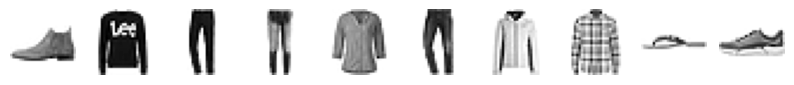

/var/folders/gw/lpn0537x0gs0p60h005j12yc0000gn/T/ipykernel_46298/2434648058.py:91: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('Train', 'validontion', loc ='upper left')


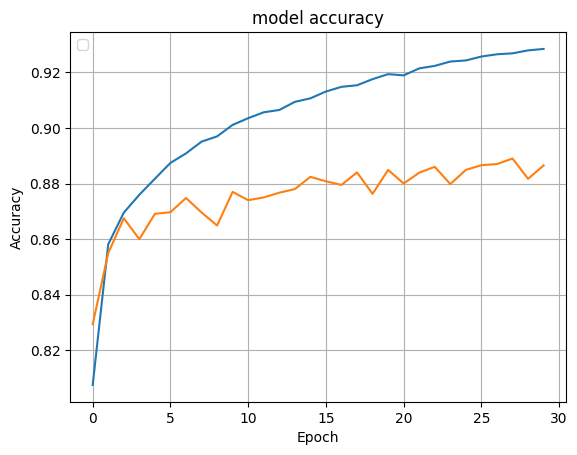

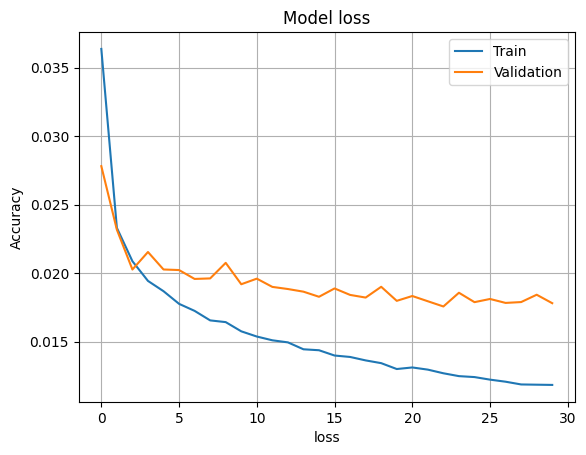

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt 


# MNIST dataset으로부터 데이터 읽기
# (x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_copy = np.copy(x_test[:10])


x_train = x_train.reshape(60000,784)  # 3D --> 2D  reshaping
x_test = x_test.reshape(10000,784)

x_train = x_train.astype(np.float32)/255.0 # nomarlization
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10) # to one-hot enc
y_test = tf.keras.utils.to_categorical(y_test, 10)

n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

mlp = Sequential()
# input to hidden layer 1 


mlp.add(Dense(units=n_hidden1, activation='tanh',
              input_shape=(n_input,),kernel_initializer='random_uniform', 
              bias_initializer='zeros'))

mlp.add(Dense(units=n_hidden2, activation='tanh',
              kernel_initializer='random_uniform',
              bias_initializer='zeros'))

mlp.add(Dense(units=n_hidden3, activation='tanh',
              kernel_initializer='random_uniform',
              bias_initializer='zeros'))

mlp.add(Dense(units=n_hidden4, activation='tanh',
              kernel_initializer='random_uniform',
              bias_initializer='zeros'))

mlp.add(Dense(units=n_output, activation='tanh',
              kernel_initializer='random_uniform',
              bias_initializer='zeros'))
mlp.compile(loss='mean_squared_error',
            optimizer=Adam(learning_rate=0.001),
            metrics=['accuracy'])

hist = mlp.fit(x_train, y_train,batch_size=128,
               epochs=30, validation_data=(x_test,y_test),
               verbose=2)

res = mlp.evaluate(x_test, y_test,verbose=0)
print("정확율 = ",res[1]*100)


# mlp.save("202016026_kjm_FASHION_4_model.keras")


rlt = mlp.predict(x_test)
print(rlt[:10])
print("정답은 : ", np.argmax(rlt[:10], axis=1))

fig, axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(x_copy[i], cmap='gray_r')
    axs[i].axis('off')
    
plt.show()


# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend('Train', 'validontion', loc ='upper left')
plt.grid()
plt.show()
      
# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('loss')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.grid()
plt.show()



Epoch 1/30
469/469 - 4s - 9ms/step - accuracy: 0.1579 - loss: 8.9953 - val_accuracy: 0.1565 - val_loss: 9.0181
Epoch 2/30
469/469 - 4s - 8ms/step - accuracy: 0.1550 - loss: 8.9772 - val_accuracy: 0.1534 - val_loss: 9.0294
Epoch 3/30
469/469 - 4s - 9ms/step - accuracy: 0.1541 - loss: 8.9791 - val_accuracy: 0.1534 - val_loss: 9.0294
Epoch 4/30
469/469 - 4s - 9ms/step - accuracy: 0.1541 - loss: 8.9791 - val_accuracy: 0.1534 - val_loss: 9.0294
Epoch 5/30
469/469 - 4s - 8ms/step - accuracy: 0.1541 - loss: 8.9791 - val_accuracy: 0.1534 - val_loss: 9.0294
Epoch 6/30
469/469 - 4s - 9ms/step - accuracy: 0.1541 - loss: 8.9791 - val_accuracy: 0.1534 - val_loss: 9.0294
Epoch 7/30
469/469 - 4s - 8ms/step - accuracy: 0.1541 - loss: 8.9791 - val_accuracy: 0.1534 - val_loss: 9.0294
Epoch 8/30
469/469 - 4s - 8ms/step - accuracy: 0.1541 - loss: 8.9791 - val_accuracy: 0.1534 - val_loss: 9.0294
Epoch 9/30
469/469 - 4s - 9ms/step - accuracy: 0.1541 - loss: 8.9791 - val_accuracy: 0.1534 - val_loss: 9.0294
E

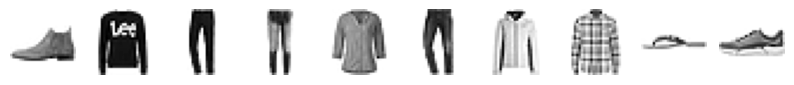

/var/folders/gw/lpn0537x0gs0p60h005j12yc0000gn/T/ipykernel_46298/1701391216.py:80: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('Train', 'validontion', loc ='upper left')


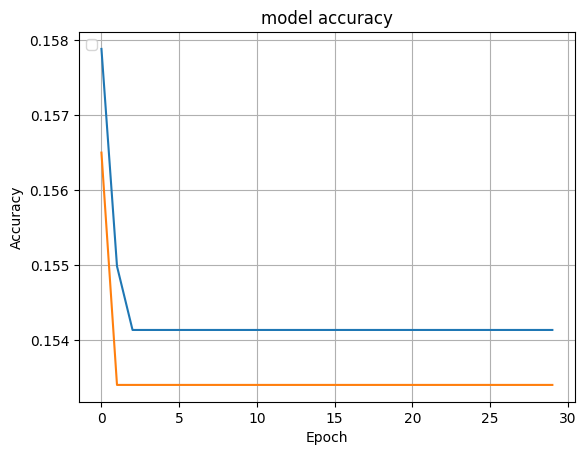

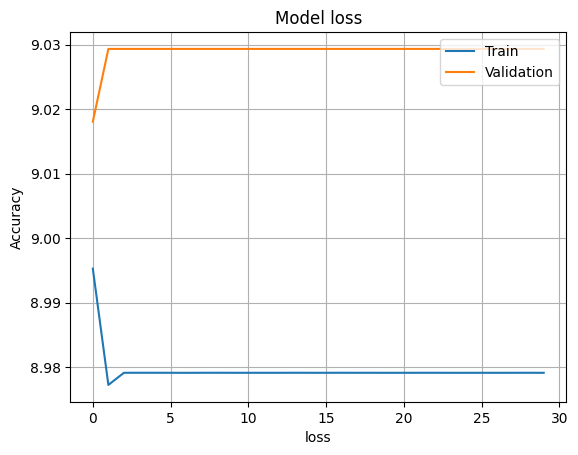

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt 


# MNIST dataset으로부터 데이터 읽기
# (x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_copy = np.copy(x_test[:10])


x_train = x_train.reshape(60000,784)  # 3D --> 2D  reshaping
x_test = x_test.reshape(10000,784)

x_train = x_train.astype(np.float32)/255.0 # nomarlization
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10) # to one-hot enc
y_test = tf.keras.utils.to_categorical(y_test, 10)

n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

mlp = Sequential()
# input to hidden layer 1 


mlp.add(Dense(units=n_hidden1, activation='tanh',
              input_shape=(n_input,)))
# hidden to layer 1 to hidden layer 2 
mlp.add(Dense(units=n_hidden2, activation='tanh'))
# hidden to layer 2 to hidden layer 3 
mlp.add(Dense(units=n_hidden3, activation='tanh'))
# hidden to layer 3 to hidden layer 4 
mlp.add(Dense(units=n_hidden4, activation='tanh'))
# hidden to layer 4 to output layer
mlp.add(Dense(units=n_output, activation='tanh'))


mlp.compile(loss='categorical_crossentropy',
            optimizer=Adam(learning_rate=0.0001),
            metrics=['accuracy'])

hist = mlp.fit(x_train, y_train,batch_size=128,
               epochs=30, validation_data=(x_test,y_test),
               verbose=2)

res = mlp.evaluate(x_test, y_test,verbose=0)
print("정확율 = ",res[1]*100)

rlt = mlp.predict(x_test)
print(rlt[:10])
print("정답은 : ", np.argmax(rlt[:10], axis=1))

fig, axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(x_copy[i], cmap='gray_r')
    axs[i].axis('off')
    
plt.show()


# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend('Train', 'validontion', loc ='upper left')
plt.grid()
plt.show()
      
# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('loss')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.grid()
plt.show()


Epoch 1/30
469/469 - 4s - 9ms/step - accuracy: 0.8119 - loss: 0.0266 - val_accuracy: 0.8434 - val_loss: 0.0226
Epoch 2/30
469/469 - 4s - 9ms/step - accuracy: 0.8574 - loss: 0.0205 - val_accuracy: 0.8455 - val_loss: 0.0221
Epoch 3/30
469/469 - 4s - 9ms/step - accuracy: 0.8665 - loss: 0.0193 - val_accuracy: 0.8557 - val_loss: 0.0204
Epoch 4/30
469/469 - 4s - 9ms/step - accuracy: 0.8741 - loss: 0.0182 - val_accuracy: 0.8562 - val_loss: 0.0207
Epoch 5/30
469/469 - 4s - 9ms/step - accuracy: 0.8823 - loss: 0.0172 - val_accuracy: 0.8654 - val_loss: 0.0198
Epoch 6/30
469/469 - 4s - 9ms/step - accuracy: 0.8877 - loss: 0.0164 - val_accuracy: 0.8646 - val_loss: 0.0194
Epoch 7/30
469/469 - 4s - 8ms/step - accuracy: 0.8925 - loss: 0.0159 - val_accuracy: 0.8739 - val_loss: 0.0181
Epoch 8/30
469/469 - 4s - 9ms/step - accuracy: 0.8966 - loss: 0.0153 - val_accuracy: 0.8700 - val_loss: 0.0185
Epoch 9/30
469/469 - 4s - 9ms/step - accuracy: 0.8997 - loss: 0.0148 - val_accuracy: 0.8772 - val_loss: 0.0176
E

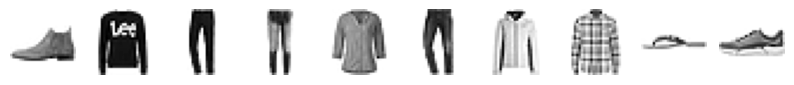

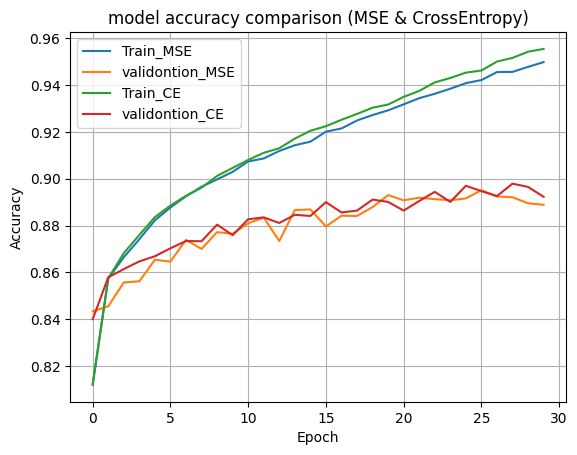

"\nplt.plot(hist_CE.history['loss'])\nplt.plot(hist_CE.history['val_loss'])\nplt.title('Model loss')\nplt.xlabel('loss')\nplt.ylabel('Accuracy')\nplt.legend(['Train', 'Validation'], loc = 'upper right')\nplt.grid()\nplt.show()\n"

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt 


# MNIST dataset으로부터 데이터 읽기
# (x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_copy = np.copy(x_test[:10])


x_train = x_train.reshape(60000,784)  # 3D --> 2D  reshaping
x_test = x_test.reshape(10000,784)

x_train = x_train.astype(np.float32)/255.0 # nomarlization
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10) # to one-hot enc
y_test = tf.keras.utils.to_categorical(y_test, 10)

n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

mlp_MSE = Sequential()
# input to hidden layer 1 


mlp_MSE.add(Dense(units=n_hidden1, activation='tanh',
              input_shape=(n_input,)))
# hidden to layer 1 to hidden layer 2 
mlp_MSE.add(Dense(units=n_hidden2, activation='tanh'))
# hidden to layer 2 to hidden layer 3 
mlp_MSE.add(Dense(units=n_hidden3, activation='tanh'))
# hidden to layer 3 to hidden layer 4 
mlp_MSE.add(Dense(units=n_hidden4, activation='tanh'))
# hidden to layer 4 to output layer
mlp_MSE.add(Dense(units=n_output, activation='softmax'))


mlp_MSE.compile(loss='mean_squared_error',
            optimizer=Adam(learning_rate=0.0001),
            metrics=['accuracy'])

hist_MSE = mlp_MSE.fit(x_train, y_train,batch_size=128,
               epochs=30, validation_data=(x_test,y_test),
               verbose=2)

res_MSE = mlp_MSE.evaluate(x_test, y_test,verbose=0)
print("MSE(MeanSquaredError)의 정확율 = ",res_MSE[1]*100)

mlp_CE = Sequential()
# input to hidden layer 1 


mlp_CE.add(Dense(units=n_hidden1, activation='tanh',
              input_shape=(n_input,)))
# hidden to layer 1 to hidden layer 2 
mlp_CE.add(Dense(units=n_hidden2, activation='tanh'))
# hidden to layer 2 to hidden layer 3 
mlp_CE.add(Dense(units=n_hidden3, activation='tanh'))
# hidden to layer 3 to hidden layer 4 
mlp_CE.add(Dense(units=n_hidden4, activation='tanh'))
# hidden to layer 4 to output layer
mlp_CE.add(Dense(units=n_output, activation='softmax'))


mlp_CE.compile(loss='categorical_crossentropy',
            optimizer=Adam(learning_rate=0.0001),
            metrics=['accuracy'])
# MES로 훈련하기
hist_CE = mlp_CE.fit(x_train, y_train,batch_size=128,
               epochs=30, validation_data=(x_test,y_test),
               verbose=2)

res_CE = mlp_CE.evaluate(x_test, y_test,verbose=0)
print("CrossEntropy의 정확율 = ",res_CE[1]*100)

rlt = mlp_MSE.predict(x_test)
print(rlt[:10])
print("정답은 : ", np.argmax(rlt[:10], axis=1))

fig, axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(x_copy[i], cmap='gray_r')
    axs[i].axis('off')
    
plt.show()

plt.plot(hist_MSE.history['accuracy'])
plt.plot(hist_MSE.history['val_accuracy'])

plt.plot(hist_CE.history['accuracy'])
plt.plot(hist_CE.history['val_accuracy'])

plt.title('model accuracy comparison (MSE & CrossEntropy)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_MSE', 'validontion_MSE','Train_CE', 'validontion_CE'], loc ='best')
plt.grid()
plt.show()
    
"""
plt.plot(hist_CE.history['loss'])
plt.plot(hist_CE.history['val_loss'])
plt.title('Model loss')
plt.xlabel('loss')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.grid()
plt.show()
"""